In [9]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
# Define the dataset path and the list of classes
dataset_path ="..\\Plant_Data"
classes = os.listdir(os.path.join(dataset_path, "train"))

# Define the input shape of the images
input_shape = (128, 128, 3)

# Define the label encoder
encoder = LabelEncoder()
encoder.fit(classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Load the training set
train_data = []
train_labels = []
for i, class_name in enumerate(classes):
    print("Loading training data for class:", class_name)
    class_path = os.path.join(dataset_path, "train", class_name)
    class_images = os.listdir(class_path)
    for img_name in class_images:
        img_path = os.path.join(class_path, img_name)
        # Load the image and resize to 128x128
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        train_data.append(img)
        train_labels.append(class_name)

# Convert the data and labels to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# Convert the class labels to one-hot vectors
train_labels_encoded = encoder.transform(train_labels)
train_labels_onehot = np_utils.to_categorical(train_labels_encoded, len(classes))


Loading training data for class: aeonium
Loading training data for class: agapanthus
Loading training data for class: almond
Loading training data for class: aloe_vera
Loading training data for class: amaryllis_flower
Loading training data for class: Anemone_flower
Loading training data for class: Asparagus
Loading training data for class: aster
Loading training data for class: baby_breath_flower
Loading training data for class: Banana
Loading training data for class: black_rose_flower
Loading training data for class: blue_chicory
Loading training data for class: blue_vervain
Loading training data for class: bougainvillea_flower
Loading training data for class: bromeliad
Loading training data for class: buttercup_flower
Loading training data for class: calendula_flower
Loading training data for class: canna
Loading training data for class: cannabis_flower
Loading training data for class: carex
Loading training data for class: cattails
Loading training data for class: Chamomile
Loading 

In [14]:
# Load the validation set
val_data = []
val_labels = []
for i, class_name in enumerate(classes):
    print("Loading validation data for class:", class_name)
    class_path = os.path.join(dataset_path, "valid", class_name)
    class_images = os.listdir(class_path)
    for img_name in class_images:
        img_path = os.path.join(class_path, img_name)
        # Load the image and resize to 128x128
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        val_data.append(img)
        val_labels.append(class_name)

# Convert the data and labels to numpy arrays
val_data = np.array(val_data)
val_labels = np.array(val_labels)

# Convert the class labels to one-hot vectors
val_labels_encoded = encoder.transform(val_labels)
val_labels_onehot = np_utils.to_categorical(val_labels_encoded, len(classes))

Loading validation data for class: aeonium
Loading validation data for class: agapanthus
Loading validation data for class: almond
Loading validation data for class: aloe_vera
Loading validation data for class: amaryllis_flower
Loading validation data for class: Anemone_flower
Loading validation data for class: Asparagus
Loading validation data for class: aster
Loading validation data for class: baby_breath_flower
Loading validation data for class: Banana
Loading validation data for class: black_rose_flower
Loading validation data for class: blue_chicory
Loading validation data for class: blue_vervain
Loading validation data for class: bougainvillea_flower
Loading validation data for class: bromeliad
Loading validation data for class: buttercup_flower
Loading validation data for class: calendula_flower
Loading validation data for class: canna
Loading validation data for class: cannabis_flower
Loading validation data for class: carex
Loading validation data for class: cattails
Loading v

Epoch 1/20
206/206 [==============================] - 129s 620ms/step - loss: 4.0423 - accuracy: 0.0601 - val_loss: 3.4761 - val_accuracy: 0.1111
Epoch 2/20
206/206 [==============================] - 126s 611ms/step - loss: 3.3649 - accuracy: 0.1480 - val_loss: 3.0431 - val_accuracy: 0.1999
Epoch 3/20
206/206 [==============================] - 125s 607ms/step - loss: 2.9898 - accuracy: 0.2211 - val_loss: 2.7585 - val_accuracy: 0.2650
Epoch 4/20
206/206 [==============================] - 127s 619ms/step - loss: 2.6689 - accuracy: 0.2927 - val_loss: 2.5462 - val_accuracy: 0.3156
Epoch 5/20
206/206 [==============================] - 127s 618ms/step - loss: 2.3342 - accuracy: 0.3702 - val_loss: 2.3129 - val_accuracy: 0.4024
Epoch 6/20
206/206 [==============================] - 136s 658ms/step - loss: 1.9917 - accuracy: 0.4500 - val_loss: 2.2030 - val_accuracy: 0.4326
Epoch 7/20
206/206 [==============================] - 129s 624ms/step - loss: 1.6498 - accuracy: 0.5293 - val_loss: 2.0726 -

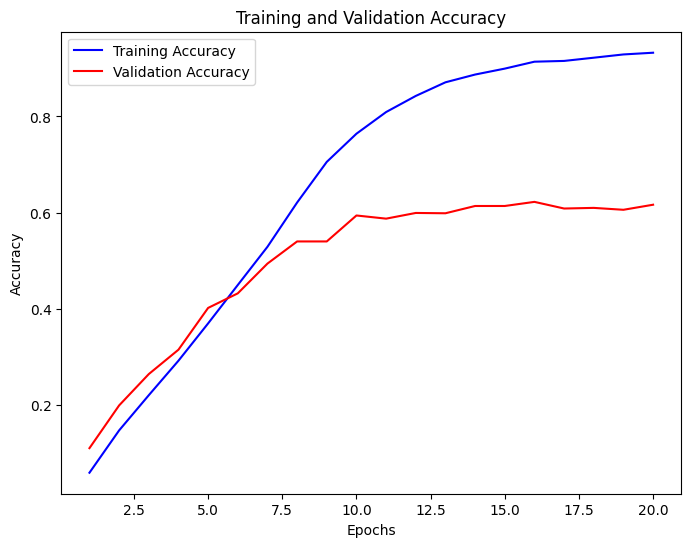

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(train_data, train_labels_onehot, validation_data=(val_data, val_labels_onehot), epochs=20, batch_size=64)

# Get training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create an array of epochs
epochs = np.arange(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save("../plant_classifier.h5")

In [ ]:
# Load the test set
test_data = []
test_labels = []
test_image_names = []
for i, class_name in enumerate(classes):
    print("Loading test data for class:", class_name)
    class_path = os.path.join(dataset_path, "test", class_name)
    class_images = os.listdir(class_path)
    for img_name in class_images:
        img_path = os.path.join(class_path, img_name)
        # Load the image and resize to 128x128
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        test_data.append(img)
        test_labels.append(class_name)
        test_image_names.append(img_name)

# Convert the data and labels to numpy arrays
test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Convert the class labels to one-hot vectors
test_labels_encoded = encoder.transform(test_labels)
test_labels_onehot = np_utils.to_categorical(test_labels_encoded, len(classes))

# Make predictions on the test set
predictions_onehot = model.predict(test_data)
predictions_labels = encoder.inverse_transform(np.argmax(predictions_onehot, axis=1))

# Print the accuracy on the test set
accuracy = np.mean(predictions_labels == test_labels)
print("Accuracy on test set:", accuracy)

# Save the predictions to a CSV file
with open("predictions.csv", "w") as f:
    f.write("image_name,predicted_label,actual_label\n")
    for i in range(len(test_data)):
        f.write("{},{},{}\n".format(test_image_names[i], predictions_labels[i], test_labels[i]))

Loading test data for class: aeonium
Loading test data for class: agapanthus
Loading test data for class: almond
Loading test data for class: aloe_vera
Loading test data for class: amaryllis_flower
Loading test data for class: Anemone_flower
Loading test data for class: Asparagus
Loading test data for class: aster
Loading test data for class: baby_breath_flower
Loading test data for class: Banana
Loading test data for class: black_rose_flower
Loading test data for class: blue_chicory
Loading test data for class: blue_vervain
Loading test data for class: bougainvillea_flower
Loading test data for class: bromeliad
Loading test data for class: buttercup_flower
Loading test data for class: calendula_flower
Loading test data for class: canna
Loading test data for class: cannabis_flower
Loading test data for class: carex
Loading test data for class: cattails
Loading test data for class: Chamomile
Loading test data for class: Chickweed
Loading test data for class: coconut
Loading test data fo